In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimesnsions de X: (100, 5)
dimensions de y: (100, 1)


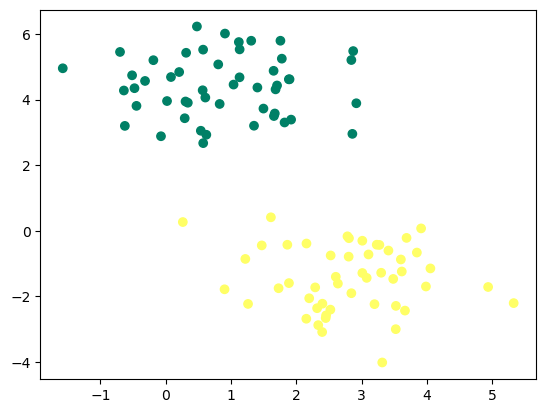

In [2]:
X, y = make_blobs(n_samples=100, n_features=5, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print("dimesnsions de X:", X.shape)
print("dimensions de y:", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.show()

In [70]:
def init(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return W, b
    

In [71]:
def model(X, W, b):
    Z = np.dot(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [10]:
def log_loss(A,y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [12]:
def gradients(A,X,y):
    dW = 1 / len(y) * X.T.dot(A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dW,db

In [83]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

In [93]:
def perceptron(X, y, learning_rate=0.1, epochs=100):
    W, b = init(X)
    Loss = []
    for i in range(epochs):
        A = model(X, W, b)
        Loss.append(log_loss(A,y))
        dW, dB = gradients(A,X,y)
        W, b = update(dW, dB, W, b, learning_rate)
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    plt.plot(Loss)
    plt.show()
    return (W,b)

Chances : [9.99876626e-01 1.27599368e-05 2.31638115e-03 1.24806230e-04
 9.99787299e-01 5.95643452e-04 1.11081352e-05 9.89987628e-01
 6.70927866e-02 9.09241121e-01 5.03971310e-05 1.57256064e-01
 9.99857378e-01 1.31044696e-04 7.54137170e-03 6.25195568e-05
 9.99941500e-01 9.99909419e-01 2.38139827e-06 9.99843301e-01
 9.47237474e-05 2.24447899e-02 1.93274973e-04 1.37117179e-04
 9.99031117e-01 9.99912106e-01 9.98409965e-01 9.99928322e-01
 9.32343170e-04 4.36563616e-05 3.11427726e-03 9.59959260e-01
 9.99949676e-01 9.93090008e-01 1.98968325e-05 9.99557799e-01
 9.99762320e-01 9.58779912e-01 1.47431001e-03 9.99869780e-01
 8.74795725e-04 9.99752394e-01 9.99889687e-01 8.78878375e-05
 9.98774822e-01 9.57632030e-01 9.99938255e-01 3.34093941e-05
 9.99994720e-01 3.65444190e-04 6.44964244e-04 2.84309616e-05
 3.33702296e-05 9.38407126e-01 4.46897791e-01 2.93120540e-04
 4.18001061e-04 9.99879032e-01 9.98887865e-01 1.83878683e-04
 9.99829301e-01 9.84926874e-07 9.99631006e-01 9.99994233e-01
 8.53673718e-0

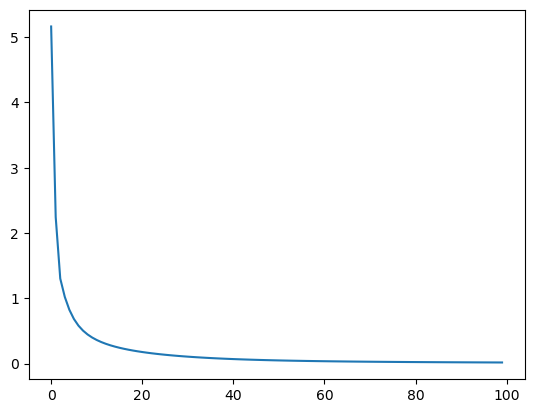

In [94]:
W, b = perceptron(X, y)

In [95]:
def predict(X, W, b):
    A = model(X, W, b)
    print("Chances : "+str(A.sum(axis=1)))
    return A >= 0.5

In [85]:
W

array([[ 1.19892952],
       [-0.96222288]])

In [52]:
b

array([2.02927449])

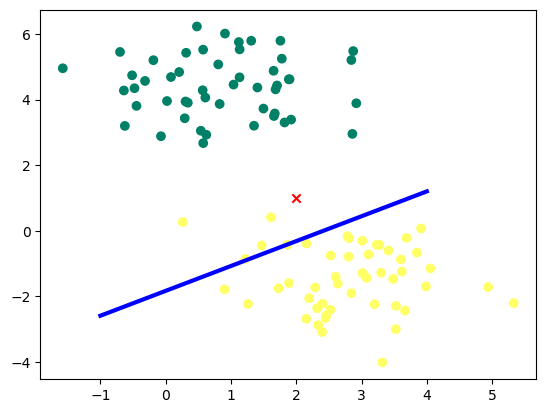

Chances : [0.39718075 0.00636806 0.00620715 0.69676514 0.03417132]


In [96]:
new_plant = np.array([2, 1])
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 -b ) / W[1]
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c="red", marker="x")
plt.plot(x0, x1, color="blue", lw=3)
plt.show()
prediction = predict(new_plant[0], W, b)
